# Число торговых дней

In [1]:
import pandas as pd #библиотека для формирования таблицы
import time #библиотке для времени работы программы

start = time.time() 

def ndays(year, file): #функция для вывода числа торговых дней за один год 
    df = pd.read_csv(file, sep=';', encoding='cp1251') #считываем csv файл
    condition = (df['<DATE>']>=year*10000) & (df['<DATE>']<(year+1)*10000) #условие для одного года
    return len(df[condition])

tickers = ['AAPL', 'AXP', 'BA', 'CAT', 'IBM', 'INTC', 'KO', 'MSFT', 'V', 'XOM']
years = range(2010,2021)
dfNDays = pd.DataFrame() #создаём объект таблтцу
dfNDays['Тикер'] = tickers 

for year in years: #проход по годам
    yearDays = [] #список кол-ва дней для всех компаний за один год
    for ticker in tickers:
        f = open(u'C:/Users/Андрюша/Desktop/Акции_курсовая/' + ticker + '.csv') #открываем файл
        yearDays.append(ndays(year, f))
    dfNDays[str(year)] = yearDays #заполняем таблицу

dfNDays.to_excel(u'C:/Users/Андрюша/Desktop/Акции_Курсовая/Число_торговых_дней.xlsx', index = False,  encoding = 'cp1251')

print("Примерное время выполнения = {}".format(time.time() - start))

dfNDays

Примерное время выполнения = 10.321851968765259


,Тикер,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AAPL,180,227,249,252,251,246,250,251,251,251,73
1,AXP,180,252,249,252,252,246,249,251,251,251,73
2,BA,180,246,249,252,252,246,249,251,251,251,73
3,CAT,180,246,248,252,252,246,249,251,251,251,73
4,IBM,180,246,249,252,252,246,249,251,251,251,73
5,INTC,180,246,249,252,251,246,249,251,251,251,73
6,KO,180,246,248,252,252,246,249,251,251,251,73
7,MSFT,180,246,249,252,251,246,249,251,251,251,73
8,V,0,25,249,148,235,251,58,42,251,251,73
9,XOM,180,246,248,252,252,246,249,251,251,251,73


# Максимальная и минимальная доходность

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import time

start = time.time()

def ndays(year, file): #функция для вывода логдоходностей
    df1 = pd.read_csv(file, sep=';', encoding='cp1251') #считываем csv файл
    condition = (df1['<DATE>']>= year*10000) & (df1['<DATE>'] < (year+1)*10000) #условие для одного года
    df = df1[condition]['<CLOSE>'] #отбираются цены закрытия для данного года
    df = pd.DataFrame.diff(np.log(df1[condition]['<CLOSE>']))[1::] #подсчет логдохоности
    return [max(df), min(df)] #Возвращает список, состоящий из максимальных скачков вверх и вниз логдоходностей для компании за данный год

tickers = ['AAPL', 'AXP', 'BA', 'CAT', 'IBM', 'INTC', 'KO', 'MSFT', 'XOM']

dfNDays_max = pd.DataFrame(index = tickers) #создаём объект таблтцу max скачки вверх логдоходности, где индексы это года
dfNDays_min = pd.DataFrame(index = tickers) #создаём объект таблтцу max скачки вверх логдоходности, где индексы это года

for year in range(2010, 2021): 
    p = [] #список занчений мин и макс логдоходности для всех компаний и одного года
    for ticker in tickers:
        f = open(u'C:/Users/Андрюша/Desktop/Акции_курсовая/' + ticker + '.csv') #открываем файл
        p.append(ndays(year, file = f)) #добавляем в список
        
    dfNDays_max[str(year)] = [i[0] for i in p] #отбираем из созданного списка max скачки вверх логдоходности и заполяем таблицу
    dfNDays_min[str(year)] = [i[1] for i in p] #отбираем из созданного списка max скачки вниз логдоходности и заполяем таблицу
    
maxi = [] #max скачки вверх логдоходности за весь период для всех компаний
mini = [] #max скачки вниз логдоходности за весь период для всех компаний
for i in range(0, len(tickers)): #проходим по всем компаниям у каждой max вверх и вниз скасчки логдоходностей
    maxi.append(max(dfNDays_max.iloc[i]))
    mini.append(min(dfNDays_min.iloc[i]))

dfNDays_max["Макс скачок вверх"] = maxi 
dfNDays_min["Макс скачок вниз"] = mini

dfNDays_max.to_excel(u'C:/Users/Андрюша/Desktop/Акции_Курсовая/Макс_скачок.xlsx', index = True,  encoding = 'cp1251')
dfNDays_min.to_excel(u'C:/Users/Андрюша/Desktop/Акции_Курсовая/Мин_скачок.xlsx', index = True,  encoding = 'cp1251')

for i in range(0, len(tickers)): #цикл для определения max из всех макс скачков вверх и min из всех max вниз
    if max(dfNDays_max["Макс скачок вверх"]) == dfNDays_max.iloc[i]["Макс скачок вверх"]:
        max_tick = tickers[i]
        print('Наибольшее относительное однодневное повышение цены = {}, наблюдается у компании с тикером {}'.format(max(dfNDays_max["Макс скачок вверх"]), max_tick))
    
    if min(dfNDays_min["Макс скачок вниз"]) == dfNDays_min.iloc[i]["Макс скачок вниз"]:
        min_tick = tickers[i]
        print('Наибольшее относительное однодневное понижение цены = {}, наблюдается у компании с тикером {}'.format(min(dfNDays_min["Макс скачок вниз"]), min_tick))

print("Примерное время выполнения = {}".format(time.time() - start))

Наибольшее относительное однодневное понижение цены = -1.9303385145445313, наблюдается у компании с тикером AAPL
Наибольшее относительное однодневное повышение цены = 0.2178171605801511, наблюдается у компании с тикером BA
Примерное время выполнения = 7.012633562088013


In [3]:
dfNDays_max

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Макс скачок вверх
AAPL,0.074056,0.050130,0.084724,0.050420,0.078580,0.055874,0.063225,0.060382,0.069220,0.066170,0.113320,0.113320
AXP,0.059755,0.066497,0.035339,0.050225,0.035806,0.060891,0.086739,0.057489,0.073410,0.044089,0.198465,0.198465
BA,0.062175,0.051378,0.051512,0.052914,0.034526,0.059817,0.046618,0.094112,0.064377,0.061239,0.217817,0.217817
CAT,0.071309,0.076306,0.045366,0.031886,0.055470,0.071527,0.074302,0.074993,0.064384,0.053625,0.102022,0.102022
IBM,0.044620,0.053872,0.042585,0.048646,0.037004,0.044735,0.048771,0.085391,0.037250,0.083045,0.109447,0.109447
INTC,0.056559,0.074683,0.032968,0.038175,0.090437,0.063437,0.034124,0.070442,0.100315,0.079674,0.175008,0.175008
KO,0.025678,0.036848,0.022842,0.055590,0.037013,0.039340,0.024347,0.018372,0.029174,0.058935,0.061755,0.061755
MSFT,0.051482,0.037342,0.055022,0.070926,0.038186,0.103713,0.055855,0.062266,0.074124,0.045675,0.133738,0.133738
XOM,0.037169,0.049673,0.033347,0.031135,0.030449,0.044349,0.050187,0.021021,0.045764,0.036460,0.121614,0.121614


In [4]:
dfNDays_min

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Макс скачок вниз
AAPL,-0.045562,-0.088783,-0.066590,-0.131968,-1.930339,-0.052490,-0.068372,-0.041901,-0.069794,-0.105410,-0.141092,-1.930339
AXP,-0.068155,-0.092455,-0.044041,-0.036749,-0.037446,-0.066455,-0.130984,-0.022912,-0.057944,-0.037847,-0.160292,-0.160292
BA,-0.065391,-0.106398,-0.036311,-0.048103,-0.053192,-0.044086,-0.093773,-0.028912,-0.066154,-0.070545,-0.272150,-0.272150
CAT,-0.056702,-0.112715,-0.051870,-0.061761,-0.051089,-0.074367,-0.069066,-0.043129,-0.078445,-0.095793,-0.151655,-0.151655
IBM,-0.040059,-0.053738,-0.050043,-0.087358,-0.074547,-0.061209,-0.058211,-0.050897,-0.080110,-0.057237,-0.138362,-0.138362
INTC,-0.044587,-0.064010,-0.039204,-0.066479,-0.052499,-0.049765,-0.096946,-0.036541,-0.090205,-0.094044,-0.196438,-0.196438
KO,-0.030195,-0.036121,-0.694290,-0.032312,-0.061507,-0.029800,-0.049477,-0.021058,-0.040661,-0.087925,-0.101557,-0.694290
MSFT,-0.042005,-0.080420,-0.041959,-0.121352,-0.040495,-0.096981,-0.073626,-0.038476,-0.056968,-0.037695,-0.160584,-0.160584
XOM,-0.037308,-0.086287,-0.039195,-0.029414,-0.043071,-0.053756,-0.042537,-0.020161,-0.057549,-0.039652,-0.129657,-0.129657


# График цен акций компаний за весь период

Время выполнения = 1.6486952304840088


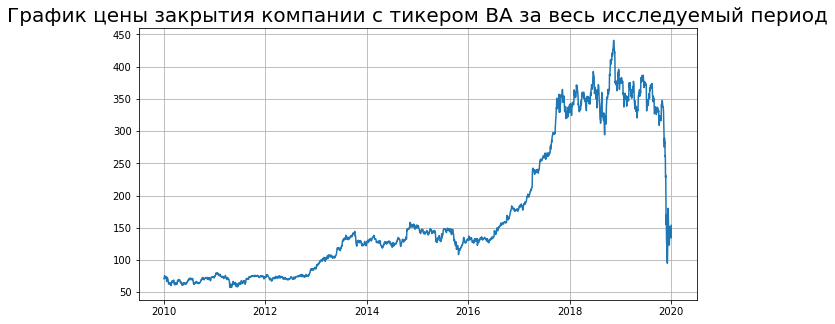

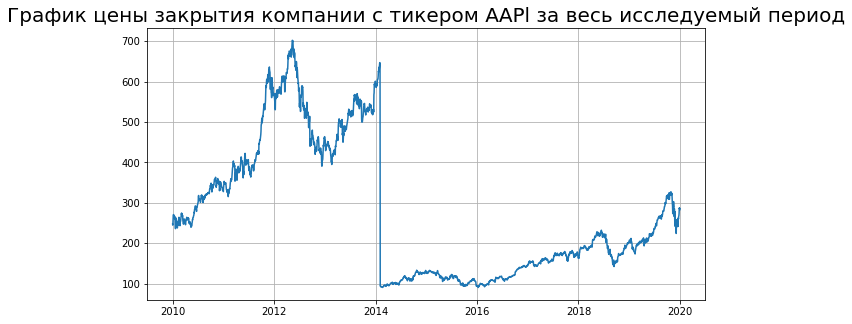

In [6]:
import matplotlib.pyplot as plt
from numpy import linspace
import time 

start = time.time()

tickers = ["BA", "AAPl"] #такеры, график которых необходимы

def Close(y1, y2, file):
    csvtab = pd.read_csv(file, sep=';', encoding='cp1251')
    df = pd.DataFrame()
    df['date'] = csvtab['<DATE>']
    df['close']= csvtab['<CLOSE>']
    condition = (df['date']>=y1*10000) & (df['date']<(y2+1)*10000)
    return df['close'][condition]

for ticker in tickers:      
    f = open(u'C:/Users/Андрюша/Desktop/Акции_курсовая/' + ticker + '.csv') #открываем файл
    y = Close(2010, 2020, f)
    x = linspace(2010, 2020, len(y))
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('График цены закрытия компании с тикером ' + ticker + ' за весь исследуемый период', size = 20)
    plt.grid(True)
    plt.plot(x, y)
    plt.savefig(u"C:/Users/Андрюша/Desktop/Акции_Курсовая/График цены закрытия компании с тикером " + ticker + " за весь исследуемый период")

print("Время выполнения = {}".format(time.time() - start))